In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,cross_val_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler,RobustScaler,MaxAbsScaler,StandardScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


##### MinMaxScaler (normalization)

In [4]:
df1 = df.copy()

mms = MinMaxScaler()
df1['Income($)'] = mms.fit_transform(df1[['Income($)']])
df1['Age'] = mms.fit_transform(df1[['Age']])
df1.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


##### StandardScaler (standardization)

In [5]:
df2 = df.copy()

ss = StandardScaler()
df2['Income($)'] = ss.fit_transform(df2[['Income($)']])
df2['Age'] = ss.fit_transform(df2[['Age']])
df2.head()

,Name,Age,Income($)
0,Rob,-1.356055,-0.480684
1,Michael,-1.009157,-0.010159
2,Mohan,-1.009157,-0.692421
3,Ismail,-1.182606,-0.715947
4,Kory,1.245679,1.401417


In [6]:
print(df.describe().round(2))
print('-'*100)
print(df1.describe().round(2))
print('-'*100)
print(df2.describe().round(2))

         Age  Income($)
count  22.00      22.00
mean   34.82   90431.82
std     5.90   43505.96
min    26.00   45000.00
25%    29.00   58500.00
50%    36.50   67500.00
75%    39.75  135250.00
max    43.00  162000.00
----------------------------------------------------------------------------------------------------
         Age  Income($)
count  22.00      22.00
mean    0.52       0.39
std     0.35       0.37
min     0.00       0.00
25%     0.18       0.12
50%     0.62       0.19
75%     0.81       0.77
max     1.00       1.00
----------------------------------------------------------------------------------------------------
         Age  Income($)
count  22.00      22.00
mean   -0.00       0.00
std     1.02       1.02
min    -1.53      -1.07
25%    -1.01      -0.75
50%     0.29      -0.54
75%     0.86       1.05
max     1.42       1.68


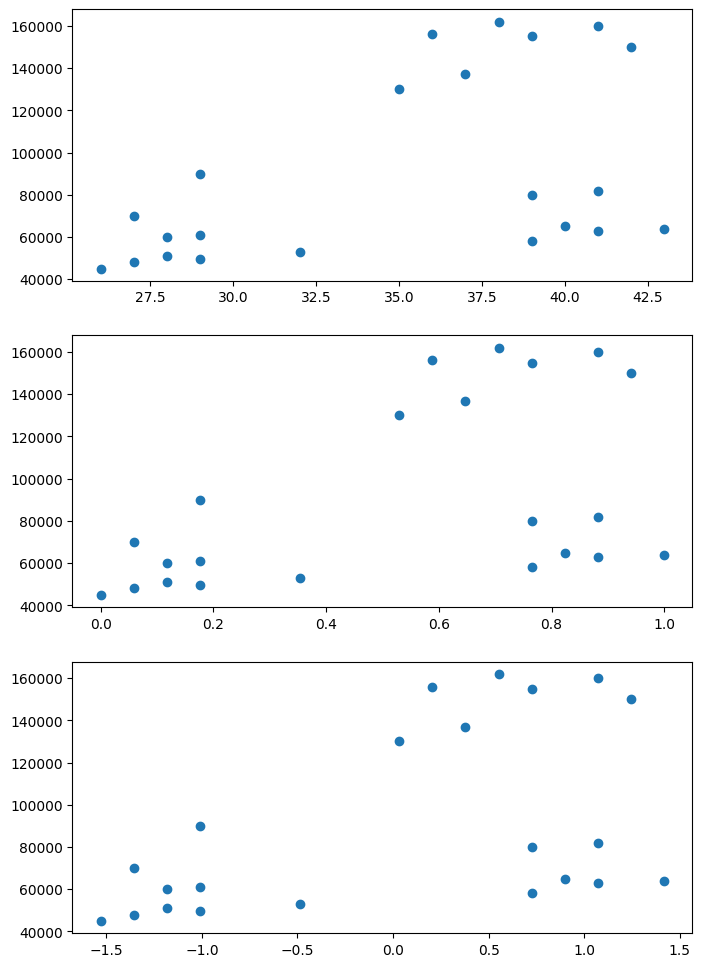

In [7]:
fig1, (sub,sub1,sub2) = plt.subplots(nrows=3,figsize=(8,12))

sub.scatter(df.Age,df['Income($)'])
sub1.scatter(df1.Age,df['Income($)'])
sub2.scatter(df2.Age,df['Income($)'])

In [8]:
km = KMeans(n_clusters=3)
km1 = KMeans(n_clusters=3)
km2 = KMeans(n_clusters=3)

cluster = km.fit_predict(df[['Age','Income($)']])
cluster1 = km1.fit_predict(df1[['Age','Income($)']])
cluster2 = km2.fit_predict(df2[['Age','Income($)']])

In [9]:
# TÌM VỊ TRÍ CỦA K-MEANS
print(km.cluster_centers_)
print('-'*100)
print(km1.cluster_centers_)
print('-'*100)
print(km2.cluster_centers_)

[[3.29090909e+01 5.61363636e+04]
 [3.82857143e+01 1.50000000e+05]
 [3.40000000e+01 8.05000000e+04]]
----------------------------------------------------------------------------------------------------
[[0.72268908 0.8974359 ]
 [0.1372549  0.11633428]
 [0.85294118 0.2022792 ]]
----------------------------------------------------------------------------------------------------
[[ 0.60143983  1.40141653]
 [-1.1247901  -0.74862223]
 [ 0.98550535 -0.51205261]]


In [10]:
# GÁN KẾT QUẢ VÀO DF
df['cluster'] = cluster
df1['cluster'] = cluster1
df2['cluster'] = cluster2

In [12]:
print(df)
print('-'*100)
print(df1)
print('-'*100)
print(df2)

        Name  Age  Income($)  cluster
0        Rob   27      70000        2
1    Michael   29      90000        2
2      Mohan   29      61000        0
3     Ismail   28      60000        0
4       Kory   42     150000        1
5     Gautam   39     155000        1
6      David   41     160000        1
7     Andrea   38     162000        1
8       Brad   36     156000        1
9   Angelina   35     130000        1
10    Donald   37     137000        1
11       Tom   26      45000        0
12    Arnold   27      48000        0
13     Jared   28      51000        0
14     Stark   29      49500        0
15    Ranbir   32      53000        0
16    Dipika   40      65000        0
17  Priyanka   41      63000        0
18      Nick   43      64000        0
19      Alia   39      80000        2
20       Sid   41      82000        2
21     Abdul   39      58000        0
----------------------------------------------------------------------------------------------------
        Name       Age  I

In [11]:
df_0 = df[df.cluster==0]
df_1 = df[df.cluster==1]
df_2 = df[df.cluster==2]

df1_0 = df1[df1.cluster==0]
df1_1 = df1[df1.cluster==1]
df1_2 = df1[df1.cluster==2]

df2_0 = df2[df2.cluster==0]
df2_1 = df2[df2.cluster==1]
df2_2 = df2[df2.cluster==2]

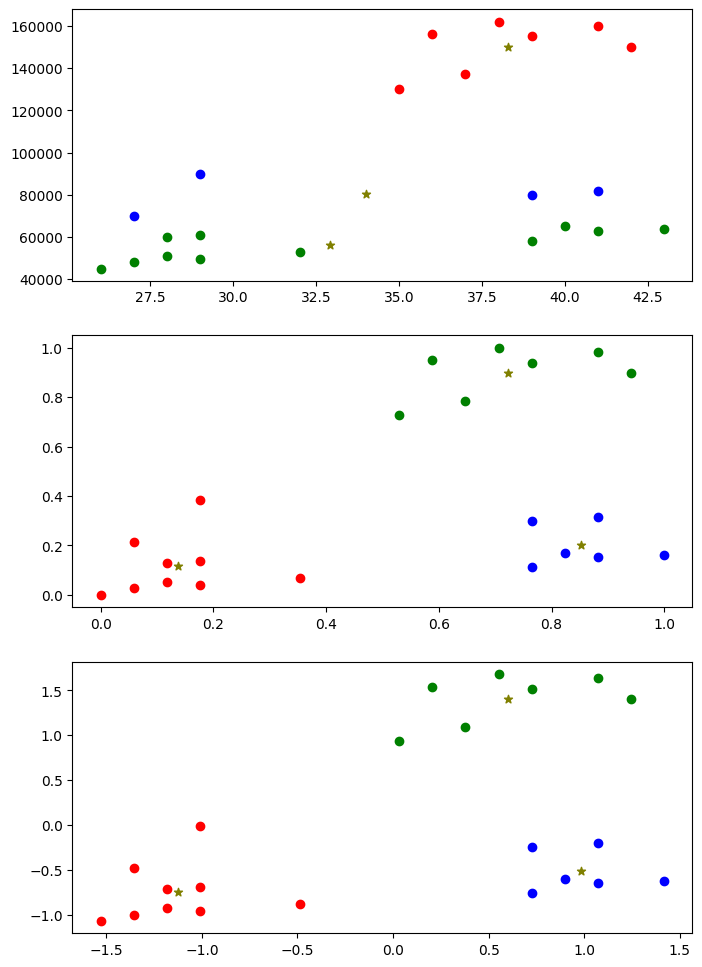

In [13]:
fig1, (sub,sub1,sub2) = plt.subplots(nrows=3,figsize=(8,12))

sub.scatter(df_0.Age,df_0['Income($)'],color='green',label=0)
sub.scatter(df_1.Age,df_1['Income($)'],color='red',label=1)
sub.scatter(df_2.Age,df_2['Income($)'],color='blue',label=2)
sub.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='olive',marker='*',label='centroid')

sub1.scatter(df1_0.Age,df1_0['Income($)'],color='green',label=0)
sub1.scatter(df1_1.Age,df1_1['Income($)'],color='red',label=1)
sub1.scatter(df1_2.Age,df1_2['Income($)'],color='blue',label=2)
sub1.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],color='olive',marker='*',label='centroid')

sub2.scatter(df2_0.Age,df2_0['Income($)'],color='green',label=0)
sub2.scatter(df2_1.Age,df2_1['Income($)'],color='red',label=1)
sub2.scatter(df2_2.Age,df2_2['Income($)'],color='blue',label=2)
sub2.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1],color='olive',marker='*',label='centroid')

# ELBOW TECHNIQUE to find the best n_clusters

In [20]:
sse = [] # sum of squared error
k_rng = range(2,12)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(df1[['Age','Income($)']])
    sse.append(km.inertia_) # inertia_ is sum of squared error
sse

[2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.2621792762345213,
 0.22020960864009398,
 0.1685851223602976,
 0.13265419827245162,
 0.10188787724979426,
 0.08139933135681814,
 0.06667741899198737]

Text(0, 0.5, 'Sum of squared error')

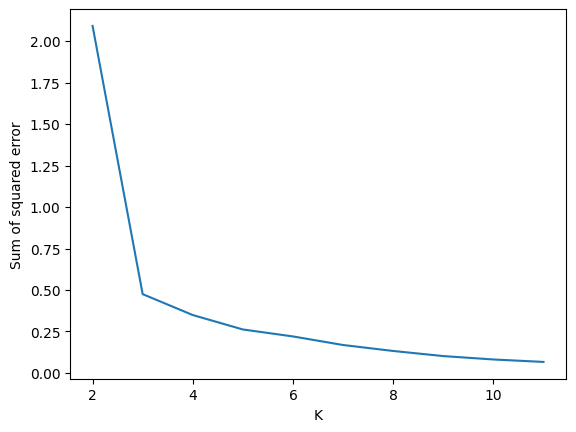

In [21]:
plt.plot(k_rng,sse)
plt.xlabel('K')
plt.ylabel('Sum of squared error')